# Intro to `Shapely` geometry objects

Satellite data assets represent a specific spatial context in imagery form. 

Such assets are used for a wide range of applications, including most commonly the extraction of objects that are useful for identification purposes (roads, buildings etc. etc.).  

Therefore, we need to cover some basic spatial understanding of geometries (e.g. points, linestrings, polygons etc.).


## Exercise 1

Go into your `satellite-image-analysis` folder and navigate to the folder `shapes`

(most probably somewhere like this if you cloned this repository to your desktop`~User/Desktop/satellite-image-analysis/shapes`).

- Load in `opencellid_ETH.shp` which contains a set of point crowdsourced cell locations triangulated from cellphone data (for Adsis Adaba). 
- Load in `afterfiber_ETH.shp` which contains fiber optic network route linestrings for ETH (the iso3 code for Ethiopia). 
- Load in `gadm_ETH.shp` which contains level 1 region polygons for ETH from the Global Database of Administrative Areas. 

Explore the data spatially. If using QGIS you can install and add QuickMapServices to add an OpenStreetMap (OSM) backdrop for context.  

Right click to inspect the properties of each layer. 

Critically review the differences between points, linestrings and boundaries. 


Next we want to understand how to produce, load, manage, export etc. geometries in Python via our Jupyter Notebook.

In Python, one of the main ways to handle geometry objects is via the package `Shapely`, which has a specific spatial model for handing different types of geometric objects. 

*The fundamental types of geometric objects implemented by Shapely are points, curves, and surfaces. Each is associated with three sets of (possibly infinite) points in the plane.* 

(Note: points, curves, and surfaces are analogous to points, linestrings, and polygons, as termed in the exercise)

Once we've created our geometry objects, `Shapely` will allow us to:

- Assess relationships between different things (e.g. geometric objects)
     - contains, intersection, touching, overlapping
- Carry out operations between different things (e.g. geometric objects)  
     - constructive (buffer, convex hull) and set-theoretic operations (intersection, union, etc.)
     
See here for more info: https://shapely.readthedocs.io/en/stable/manual.html


## Points

According to `Shapely`: *A Point has an interior set of exactly one point, a boundary set of exactly no points, and an exterior set of all other points. A Point has a topological dimension of 0.*

An easier way to think of a point is as a mere set of coordinates:

    - (1, 3)
    - (4.34, 9.12)
    - (0.10204, -1.09279)

`Shapely` enables us to create these as a `Shapely` object


First, let's install `Shapely` into our current environment. 

In [1]:
# Example
import sys
!conda install --yes --prefix {sys.prefix} shapely

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4




Next, let us load from `Shapely` the `Point` function, which enables us to create point geometry objects.

In [1]:
# Example
from shapely.geometry import Point
my_point = Point(1.15, 2.43)
print(my_point)

ModuleNotFoundError: No module named 'shapely'

In `Jupyter`, we can also view the point in geographic space, which might help you understand the differences between points, lines and polygons more easily.

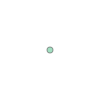

In [3]:
# Example
my_point = Point(1.15, 2.43)
my_point

`Shapely` also allows us to check what type of geometry we have specified our object to be, using the `.geom_type` function (geom is short for geometry).

In [4]:
# Example
my_point.geom_type

'Point'

We can use this function repeatedly, to make lots of different `Shapely` geometry objects (let's try create `my_point2` from the coordinate x=2 and y=3):

In [5]:
# Example
my_point2 = Point(2, 3)
print(my_point2)

POINT (2 3)


Now we have two different points, we can used `Shapely` to do very usful things, like measure the distance between them using the `.distance()` function.

In [6]:
# Example
dist = my_point.distance(my_point2)
dist

1.0234256201600582

Although `Shapely` does a lot, the thing to remember is that it treats all geometry objects as being in the same coordinate reference system. So you need to remember that, otherwise you may produce erroneous results (e.g., the distance between a point in epsg:4326 and a point in WGS epsg:3857, will be completely wrong, as you're mixing coordinates measured in decimel degrees and meters). 

Importantly, a `Point`, as just a single coordinate, will have zero area and zero length:

In [7]:
# Example
print(my_point.area, my_point.length)

0.0 0.0


Moreover, the x-y bounding box with be a tuple containing `minx`, `miny`, `maxx` and `maxy`. 

In [8]:
# Example
print(my_point.bounds)

(1.15, 2.43, 1.15, 2.43)


If we need to, we can still access the underlying coordinates from our `Shapley` geometry object.

In [9]:
#Example 
print(my_point.coords) # Shaple geometry object
print(list(my_point.coords)) # List of Shapely coordinates

[(1.15, 2.43)]


## Exercise 2

Now let us put this knowledge to work. 

Create a new set of points with the following coordinates, and print the geometry objects:

    - x = 4, y = 8 (p1)
    - x = 2, y = 4 (p2)

In [10]:
#Enter your attempt below:


Check the geometry types of your object:

In [11]:
#Enter your attempt below:


Can you confirm the area and length of your points?

In [12]:
#Enter your attempt below:


Now try measure the distance between your two points:

In [13]:
#Enter your attempt below:


Print the bounds of the two point and inspect the results:

In [14]:
#Enter your attempt below:


## Lines

More precisely named 'linestrings', these objects contain at least two points.

`Shapely` states: 

*The constructed LineString object represents one or more connected linear splines between the points. Repeated points in the ordered sequence are allowed, but may incur performance penalties and should be avoided. A LineString may cross itself (i.e. be complex and not simple).*

Let's have a go at creating our first `linestring`:

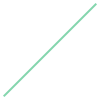

In [15]:
# Example
from shapely.geometry import LineString
my_line = LineString([(2,3), (3, 4)])
my_line

Let's confirm that:

In [16]:
# Example
my_line.geom_type

'LineString'

We have similar functionality to the `Point` objects we played with previously. 

For example, a line with have a zero area:

In [17]:
# Example
my_line.area

0.0

But in contrast, a line will have a clear length:

In [18]:
# Example
my_line.length # Your units depend on the coordinate reference system!

1.4142135623730951

And a line has the following bounds:

In [19]:
# Example
my_line.bounds

(2.0, 3.0, 3.0, 4.0)

Finally, we can access the coordinates within our `Shapely` object easily:

In [20]:
# Example
print(list(my_line.coords))

[(2.0, 3.0), (3.0, 4.0)]


## Exercise 3

Now let us implement what we learned in this section on lines.

Create lines using the following coordinates:

    - x1=2, y1=2, x2=4, y2=4, x3=2.5, y3=3.5 (simple_line)
    - x1=4, y1=4, x2=2, y2=2, x3=2.5, y3=3.5, x4=4, y4=2 (complex_line)


In [21]:
#Enter your attempt below:


Find the area and length of these two lines and print the results:
    

In [22]:
#Enter your attempt below:


Find the bounds of these two lines and print the results:

In [23]:
#Enter your attempt below:


## Polygons

A polygon can be thought of practically as a collection of tuple points forming a closed shape. 

For example, in geometry:

*...a polygon is a plane figure that is described by a finite number of straight line segments connected to form a closed polygonal chain*

In `Shapely`, a `Polygon` function is:

*A constructor taking two positional parameters. The first is an ordered sequence of (x, y[, z]) point tuples and is treated exactly as in the LinearRing case. The second is an optional unordered sequence of ring-like sequences specifying the interior boundaries or “holes” of the feature.*

Let's explore what this means further using the `Polygon` `Shapely` function:


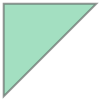

In [24]:
# Example
from shapely.geometry import Polygon
my_polygon = Polygon([(2,2), (3, 3), (2, 3), (2,2)])
my_polygon

Let's confirm that:

In [25]:
# Example
my_polygon.geom_type

'Polygon'

We can also view this shape within `jupyter` as follows:

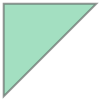

In [26]:
# Example
my_polygon # See how 3 is the minimum number of lines provided

We can then explore the (non-zero) area of our polygon using `.area`:

In [27]:
# Example
area = my_polygon.area
print(area)

0.5


And the (non-zero) length too using `.length`:

In [28]:
# Example
length = my_polygon.length
print(length)

3.414213562373095


It is also possible to obtain the outer bounds of our polygon using `.bounds`:

In [29]:
# Example
bounds = my_polygon.bounds
print(bounds)

(2.0, 2.0, 3.0, 3.0)


We can also make a polygon with internal polygons too.

Note how this time when we use the `Polygon` function, we supply the exterior list, followed by the interior coordinates as a list of lists:

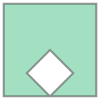

In [30]:
exterior = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
interior = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)][::-1]
my_polygon2 = Polygon(exterior, [interior])
my_polygon2

We can then access the interior coordinates as we please: 

In [31]:
# Example
list(my_polygon2.interiors) #this is a Shapely object in a list

[<LINEARRING (1 0, 1.5 0.5, 1 1, 0.5 0.5, 1 0)>]

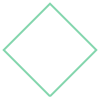

In [32]:
# Example
list(my_polygon2.interiors)[0] #this is our actual Shapely object

In [33]:
# Example
list(my_polygon2.interiors[0].coords) #a list of coordinate tuples

[(1.0, 0.0), (1.5, 0.5), (1.0, 1.0), (0.5, 0.5), (1.0, 0.0)]

Or we can access the exterior coordinates as we please: 

In [34]:
# Example
list(my_polygon2.exterior.coords)

[(0.0, 0.0), (0.0, 2.0), (2.0, 2.0), (2.0, 0.0), (0.0, 0.0)]

## Exercise 4

We now need to recap on the content introduced for our `Shapely` `Polygon` function.

First, create a polygon (called `my_polygon`) with the following tuples:
    
    - x=1, y=1
    - x=1, y=4
    - x=4, y=4
    - x=4, y=1
    - x=1, y=1


In [35]:
#Enter your attempt below:


Now get the area of your polygon:

In [36]:
#Enter your attempt below:


And the bounds of your polygon:

In [37]:
#Enter your attempt below:


Along with the exterior coordinates:

In [38]:
#Enter your attempt below:


Secondly, add an inner polygon and call the total object `my_polygon2`, with the following coordinates:
    
    - x=1.5, y=1.5
    - x=1.5, y=3.5
    - x=3.5, y=3.5
    - x=3.5, y=1.5
    - x=1.5, y=1.5

In [39]:
#Enter your attempt below:


And now extract the exterior coordinates from `my_polygon2` and take the area. 

Hint: You need to extract the exterior coordinates, make a new polygon, and then take the area. 

In [40]:
#Enter your attempt below:


Compare this with the area for the interior coordinates from `my_polygon2`.

Hint: You need to extract the interior coordinates, make a new polygon, and then take the area. 

In [41]:
#Enter your attempt below:
